In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.Series([7, 2, 6, 6, 2, 2, 8, 1, 3, 7, 8, 8, 8, 4, 5, 3, 4, 7,
                      1, 1, 3, 3, 8, 7, 6, 2, 1, 1, 5, 7, 4, 5, 8, 3, 2, 1,
                      4, 3, 8, 7, 8, 5, 3, 4, 2, 2, 6, 7, 6, 4, 6, 6, 3, 3,
                      6, 2, 5, 2, 4, 6, 4, 6, 8, 6, 2, 4, 5, 7])

In [3]:
n = len(raw_data) # Número de experimentos
n

68

In [4]:
freqs = raw_data.value_counts().sort_index()
freqs

1     6
2    10
3     9
4     9
5     6
6    11
7     8
8     9
dtype: int64

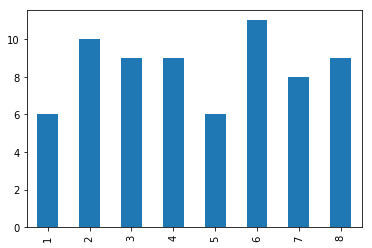

In [5]:
freqs.plot.bar();

In [6]:
k = len(freqs.index) # Número de lados do dado
k

8

In [7]:
expected = pd.Series([float(n) / k] * k, index=freqs.index)
expected

1    8.5
2    8.5
3    8.5
4    8.5
5    8.5
6    8.5
7    8.5
8    8.5
dtype: float64

In [8]:
chi_squared = ((freqs - expected) ** 2 / expected).sum()
chi_squared

2.5882352941176472

In [9]:
df = k - 1
df

7

In [10]:
p = stats.chi2.sf(chi_squared, df=df)
p

0.92030761806367933

In [11]:
alpha = .05
print(["Retain the null! Can't tell anything about any possible dice bias...",
       "Reject the null! Dice is biased!!"][p <= alpha])

Retain the null! Can't tell anything about any possible dice bias...


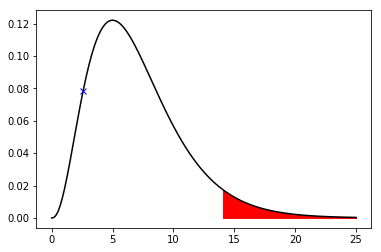

In [12]:
x = np.linspace(0, 25, 500)
chi_squared_y = stats.chi2.pdf(x, df=df)
filt_alpha = x > stats.chi2.isf(alpha, df=df)
plt.plot(x, chi_squared_y, color="black")
plt.fill_between(x[filt_alpha], chi_squared_y[filt_alpha], 0, color="red")
plt.plot([chi_squared], [stats.chi2.pdf(chi_squared, df=df)], "bx");